In [2]:
import matplotlib.pyplot as plt #Βιβλιοθήκη γραφικών και λέμε στο Jupyterνα κάνει Render τα γραφικά μέσα στο Notebook
%matplotlib inline 
import numpy as np #Βιβλιοθήκη Αριθμητικών συναρτήσεων 

### Παράδειγμα Δημιουργίας γραφικών

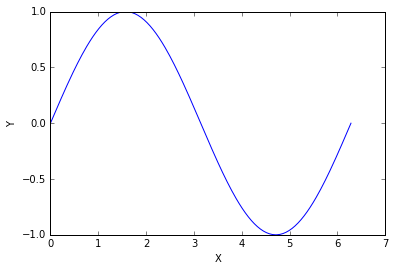

In [3]:
xx=np.linspace(0.,2.*np.pi,200) #Δημιουργούμε ένα ομοιογενή χώρο 200 στοιχείων απο 0 έως 2π
plt.plot(xx,np.sin(xx)) #Εκτυπώνουμε τα σημεία (x,sin(x)) χρησιμοποιώντας την συνάρτηση sin() της Numpy
plt.xlabel('X')
plt.ylabel('Y')

In [4]:
!ls #Τρέχουμε την εντολή του bash (linux) ls μέσα από το notebook

1st Workshop.ipynb  README.md  SN_d_tot_V2.0.csv  solar-flux.csv


In [5]:
!head SN_d_tot_V2.0.csv #Η εντολή head εκτυπώνει τα πρώτα στοιχεία του αρχείου SN_d_tot_V2.0.csv

1818;01;01;1818.001;  -1; -1.0;   0;1
1818;01;02;1818.004;  -1; -1.0;   0;1
1818;01;03;1818.007;  -1; -1.0;   0;1
1818;01;04;1818.010;  -1; -1.0;   0;1
1818;01;05;1818.012;  -1; -1.0;   0;1
1818;01;06;1818.015;  -1; -1.0;   0;1
1818;01;07;1818.018;  -1; -1.0;   0;1
1818;01;08;1818.021;  65; 10.2;   1;1
1818;01;09;1818.023;  -1; -1.0;   0;1
1818;01;10;1818.026;  -1; -1.0;   0;1


In [6]:
A=np.loadtxt('SN_d_tot_V2.0.csv',delimiter=';') #Εισάγουμε τα δεδομένα μέσα σε ένα δισδιάστατο πίνακα (A)
A

array([[  1.81800000e+03,   1.00000000e+00,   1.00000000e+00, ...,
         -1.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  1.81800000e+03,   1.00000000e+00,   2.00000000e+00, ...,
         -1.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  1.81800000e+03,   1.00000000e+00,   3.00000000e+00, ...,
         -1.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       ..., 
       [  2.01700000e+03,   2.00000000e+00,   2.60000000e+01, ...,
          2.80000000e+00,   1.10000000e+01,   0.00000000e+00],
       [  2.01700000e+03,   2.00000000e+00,   2.70000000e+01, ...,
          3.00000000e+00,   1.90000000e+01,   0.00000000e+00],
       [  2.01700000e+03,   2.00000000e+00,   2.80000000e+01, ...,
          5.00000000e+00,   1.40000000e+01,   0.00000000e+00]])

In [7]:
t=A[:,3] #Η τέταρτη στήλη είναι ο χρόνος παρατήρησης (σε δεκαδική μορφή)
s=A[:,4] #Η πέμπτη στήλη είναι ο αριθμός των κηλίδων

In [8]:
N=s.shape[0] #Αριθμός παρατηρήσερων
N

72743

## Χρήση του αλγορίθμου FFT
(https://en.wikipedia.org/wiki/Fast_Fourier_transform) 

Μέσω του αλγορίθμού FFT που εμπεριέχεται στη βιβλιοθήκη numpy.fft [1] θα υπολογίσουμε το διακριτό μετασχηματισμό fourier της χρονοσειράς s (αριθμός κηλίδων) 
$$
{\displaystyle X_{k}=\sum _{n=0}^{N-1}x_{n}e^{-i2\pi kn/N}\qquad k=0,\dots ,N-1.}
$$

[1] Cooley, James W., and John W. Tukey, 1965, "An algorithm for the
        machine calculation of complex Fourier series," *Math. Comput.*
        19: 297-301.
        https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm

In [9]:
dt=t[400]-t[399] #Χρονική διαφορά ανάμεσα σε δύο παρατηρήσεις (δεκαδική μορφή)
print('Χρονική διαφορά ανάμεσα στη παρατήρηση 400 και 399: {:.4f}'.format(dt)) #Εκτύπωσε τη (μεχρι 4 δεκαδικα)
freq=np.fft.fftfreq(N,d=dt) #Χώρος συχνοτήτων για τις συγκεκριμένες παρατηρήσεις μέσω της βιβλιοθηκης fft της numpy
fs=np.abs(np.fft.fft(s))/N  #Πλατος του σήματος για τις παραπάνω συχνότητες

Χρονική διαφορά ανάμεσα στη παρατήρηση 400 και 399: 0.0020


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


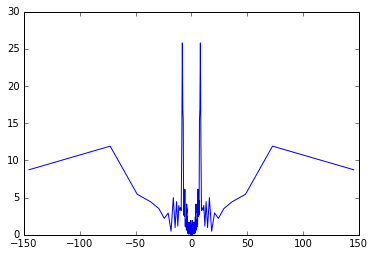

In [10]:
plt.plot(1./freq,fs) #Διάγραμμα του πλάτους των συχνοτήτων για κάθε περίοδο

(0.0, 20)

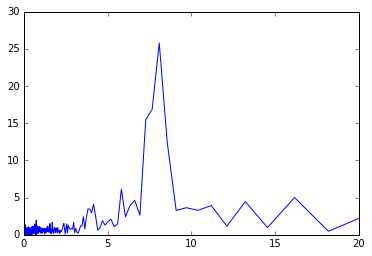

In [11]:
plt.plot(1./freq[freq>0],fs[freq>0]) #Κρατάμε μόνο τις τιμές των θετικών συχνοτήτων 
plt.xlim(None,20) #Περιόρισε το διάγραμμα μέχρι τη περίοδο 20 ετών

In [12]:
Maxf= 1./freq[fs[freq>0].argmax()] #Υπολόγισε τη περίοδο για την οποία έχουμε μέγιστο
Maxf

8.5579999997976302

Η παραπάνω ανάλυση μας δίνει μια περίοδο των 8.558 ετών(?!). Μήπως το dt δεν είναι πάντα το ίδιο.

Χρονική διαφορά ανάμεσα στη παρατήρηση 40 και 39: 0.0030
Νέα Μέγιστη τιμή 12.837 έτη


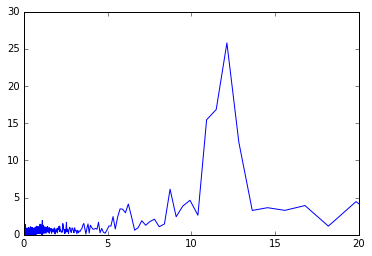

In [13]:
dt=t[40]-t[39]
print('Χρονική διαφορά ανάμεσα στη παρατήρηση 40 και 39: {:.4f}'.format(dt))
freq=np.fft.fftfreq(N,d=dt)
fs=np.abs(np.fft.fft(s))/N

plt.plot(1./freq[freq>0],fs[freq>0])
plt.xlim(None,20)
Maxf= 1./freq[fs[freq>0].argmax()]
print('Νέα Μέγιστη τιμή {:.3f} έτη'.format(Maxf)) 

Παρατηρούμε λοιπόν οτι υπαρχουν διαφορετικες χρονικές περίοδοι ανα παρατήρηση.


### List Comprehensions
List Comprehension ονομάζεται η διαδικασία δημιουργίας συνόλων αντικειμένων (δηλαδή μια λίστα) μέσω επεξεργασίας άλλων λιστών. Η σύνταξη μοιάζει περίπου με τη μαθηματική σύνταξη ορισμού κάποιως συνόλων.
Για παράδειγμα η List Comprehension του $\{x^2 \mid x \in [0,10] \}$ είναι η παρακάτω:

In [14]:
[i**2 for i in np.linspace(0,10,10)]

[0.0,
 1.2345679012345681,
 4.9382716049382722,
 11.111111111111112,
 19.753086419753089,
 30.864197530864196,
 44.44444444444445,
 60.493827160493836,
 79.012345679012356,
 100.0]

Μέ τη βοήθιεα ενός List Comprehension θα φτιάξουμε ένα πίνακα με τις διαφορές των χρόνων των παρατήρησεων, με μέγεθος $N-1$

In [15]:
dts=np.array([t[i]-t[i-1] for i  in range(1,N)])
dts

array([ 0.003,  0.003,  0.003, ...,  0.003,  0.003,  0.002])

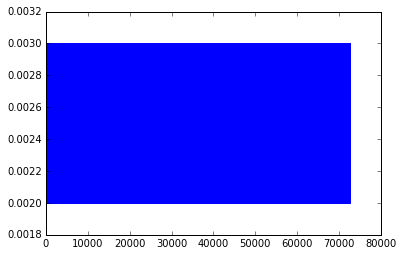

In [16]:
plt.plot(dts)

Από το παραπάνω διάγραμμα βλεπουμε ότι οι χρονικές διαφορές αλλάζουν με τιμές από 0.002 έως 0.003, καλύτερα βλέπουμε τη διακύμανση μέσω ενός ιστογράμματος εντολή hist της matplotlib.pyplot.

(array([ 19067.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  53675.]),
 array([ 0.002 ,  0.0021,  0.0022,  0.0023,  0.0024,  0.0025,  0.0026,
         0.0027,  0.0028,  0.0029,  0.003 ]),
 <a list of 10 Patch objects>)

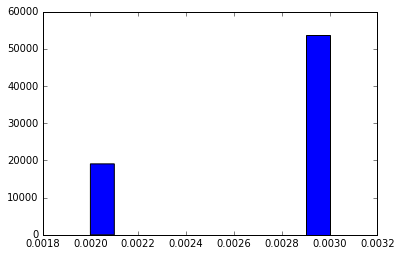

In [17]:
plt.hist(dts)

Για να χρησιμοποιήσουμε την FFT θα πρέπει τα χρονικά διαστήματα ανάμεσα στις παρατηρήσεις μας να είναι σταθερά. Έτσι σε πρώτη προσέγγιση μπορούμε να αναδημιουργήσουμε το σήμα μας μέσω μιας γραμμικής παρεμβολής (interpolation). Η βιβλιοθήκη scipy περιέχει πολλές εφαρμογές παρεμβολής, εμεις θα δοκιμάσουμε τη γραμμική (παρότι μπορεί να μην είναι ιδανική για το παράδειγμα μας)

In [18]:
from scipy.interpolate import interp1d

In [19]:
s2=interp1d(t,s) #Δημιουργία ενος interpolated "συνεχούς" σήματος με βάση τα δεδομένα (t,s)
t2=np.linspace(t[0],t[-1],N) #Δημιουργία ενός "συνεχούς" ισοχρονικών διαστημάτων

In [20]:
s2(t2)

array([ -1.        ,  -1.        ,  -1.        , ...,  37.04847268,
        45.5403939 ,  59.        ])

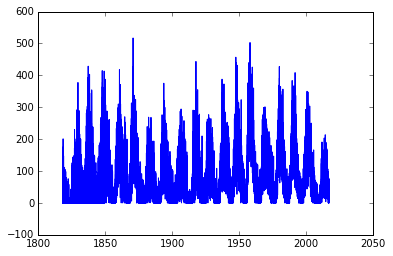

In [21]:
plt.plot(t2,s2(t2))

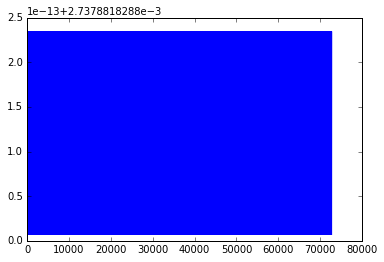

In [25]:
dts2=[t2[i]-t2[i-1] for i  in range(1,N)]
plt.plot(dts2)

0.00273788182881
11.7153963455


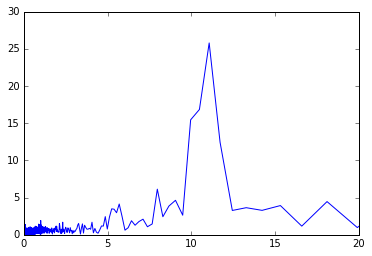

In [23]:
dt=t2[4]-t2[3]
print(dt)
freq=np.fft.fftfreq(N,d=dt)
fs=np.abs(np.fft.fft(s2(t)))/s.shape[0]
plt.plot(1./freq[freq>0],fs[freq>0])
plt.xlim(None,20)
print(1./freq[fs[freq>0].argmax()])